In [2]:

import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical


Consruct emotion model, download and load weights (Emotion.py in Deepface)

In [3]:
# load pickle file
files = ['../data_features_labels/Eastern_Asian_Dataset.pkl', '../data_features_labels/Eastern_Asian2_Dataset.pkl' 
         ]
# files = ['Eastern_Asian_Dataset.pkl']
x_train_list = []
y_train_list = [] 
for file in files:
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_train_list.append(pic)
        y_train_list.append(label)

In [4]:
X_train = np.array(x_train_list).reshape(-1, 64, 64, 1)
#one-hot encode target column
Y_train = to_categorical(np.array(y_train_list))

In [5]:
Y_train[500].argmax()

0

In [6]:
np.unique(Y_train.argmax(axis=1), return_counts=True)

(array([0, 1]), array([1450, 3649]))

In [7]:
indices = [np.where(Y_train.argmax(axis=1)==i)[0] for i in np.unique(Y_train.argmax(axis=1))]
indices

[array([ 104,  105,  106, ..., 5018, 5019, 5020]),
 array([   0,    1,    2, ..., 5096, 5097, 5098])]

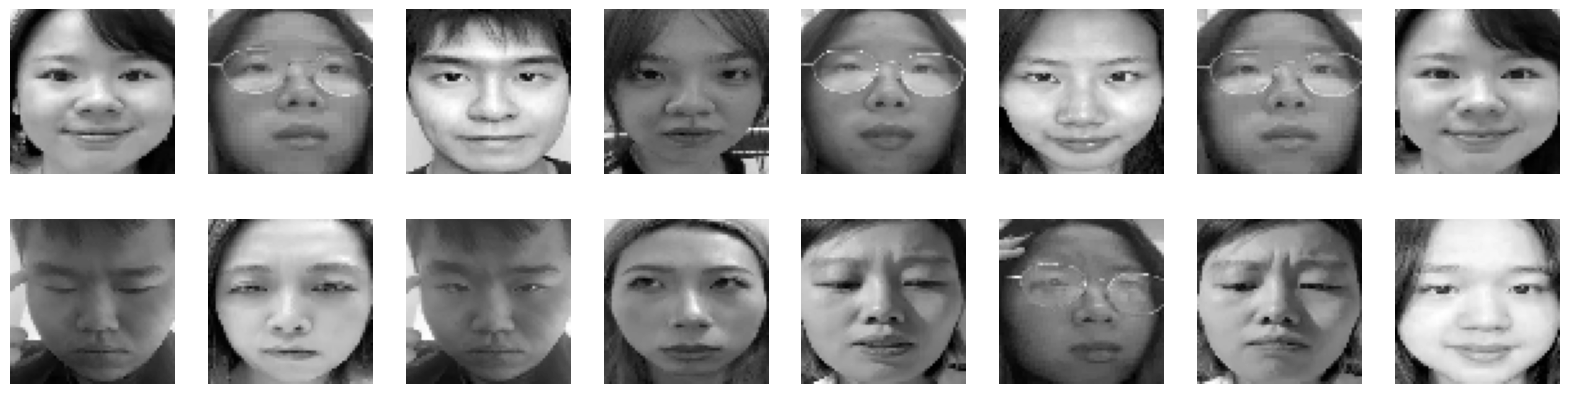

In [8]:
label_names = ['Not Confused', 'Confused']
rows = 2
cols = 8
# num_to_choose = int(rows*cols)
# np.random.seed(42)
# chosen_nums = np.random.choice(np.arange(len(X_train)), size=num_to_choose, replace=False)
fig, ax = plt.subplots(rows, cols, figsize=(20, 5), sharex=True, sharey=True)

for row in range(rows):
    np.random.seed(35)
    # num_to_choose = int(rows*cols)
    chosen_nums = np.random.choice(indices[row], size=cols, replace=False)
    count = 0
    for col in range(cols):
        ax[row, col].imshow(X_train[chosen_nums[count]], cmap='binary_r')
        
        # ax[row, col].text(32, 10, label_names[Y_train[chosen_nums[count]].argmax()], 
        #                   horizontalalignment='center', color='r')
        count += 1
        
        ax[row, col].axis('off')
fig.savefig('../figure_panels/fig1c_EA_examples.svg', bbox_inches = 'tight', dpi=300)

/var/folders/5m/4tj5fx915fv1z073c22c2q7m0000gn/T/ipykernel_31313/1526854759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='y', width=0.8,


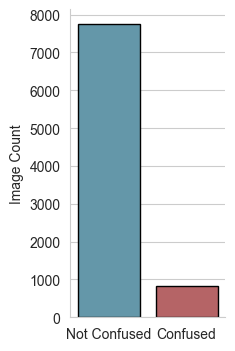

In [39]:

df = pd.DataFrame({'y': y_train_list})
fig, ax = plt.subplots(1, 1, figsize=(2, 4))

ax = sns.countplot(data=df, x='y', width=0.8, 
                   palette=['#599CB4', '#C25759'],
                   edgecolor='k')

ax.set_xticks(np.arange(len(label_names)))
ax.set_xticklabels(label_names)
ax.set_xlabel('')
ax.set_ylabel('Image Count')
ax.spines[['top', 'right']].set_visible(False)
# fig.savefig('DAiSEE_imbalanced_counts.svg', bbox_inches = 'tight', dpi=300)

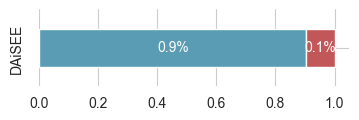

In [84]:
df = pd.DataFrame({'y': y_train_list})
norm_ratio = df.groupby('y').size().to_frame('ratio')/df.shape[0]
fig, ax = plt.subplots(1, 1, figsize=(4, 1))

norm_ratio.T.plot.barh(stacked=True, color=['#599CB4', '#C25759'], legend=False, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('DAiSEE')
ax.set_yticklabels('')
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
# Adding percentage labels on each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', color='w', label_type='center')
fig.savefig('../figure_panels/fig1b.svg', bbox_inches='tight', dpi=300)


In [85]:
norm_ratio

,ratio
y,
0,0.904445
1,0.095555


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
x_train.shape, x_test.shape

((21463, 64, 64, 1), (5366, 64, 64, 1))

In [18]:
model.fit(x_train, y_train, epochs=200)

2024-06-02 21:41:15.593251: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200


2024-06-02 21:41:16.052045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


671/671 [==============================] - 27s 39ms/step - loss: 0.8863 - accuracy: 0.6750
Epoch 2/200
671/671 [==============================] - 24s 36ms/step - loss: 0.5085 - accuracy: 0.7341
Epoch 3/200
671/671 [==============================] - 24s 35ms/step - loss: 0.4640 - accuracy: 0.7711
Epoch 4/200
671/671 [==============================] - 23s 35ms/step - loss: 0.4375 - accuracy: 0.7882
Epoch 5/200
671/671 [==============================] - 25s 37ms/step - loss: 0.4160 - accuracy: 0.8017
Epoch 6/200
671/671 [==============================] - 25s 37ms/step - loss: 0.4068 - accuracy: 0.8106
Epoch 7/200
671/671 [==============================] - 25s 37ms/step - loss: 0.3856 - accuracy: 0.8151
Epoch 8/200
671/671 [==============================] - 25s 37ms/step - loss: 0.3658 - accuracy: 0.8292
Epoch 9/200
671/671 [==============================] - 25s 37ms/step - loss: 0.3466 - accuracy: 0.8389
Epoch 10/200
671/671 [==============================] - 25s 38ms/step - loss: 0.3406 

In [19]:
model.save_weights('crop_confusion_weights.h5')

In [20]:
prediction_proba = model.predict(x_test)
y_predict = prediction_proba.argmax(axis=1)

2024-06-02 23:25:52.515278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [21]:
y_predict.shape

(5366,)

In [22]:
y_true = y_test.argmax(axis=1)

In [23]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_predict, normalize='true')

In [24]:
print(classification_report(y_true, y_predict, target_names=label_names))

              precision    recall  f1-score   support

Not Confused       0.82      0.85      0.83      2430
    Confused       0.87      0.85      0.86      2936

    accuracy                           0.85      5366
   macro avg       0.85      0.85      0.85      5366
weighted avg       0.85      0.85      0.85      5366



In [25]:
label_names = ['Not Confused', 'Confused']

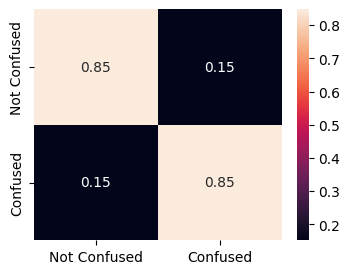

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.heatmap(conf_mat, xticklabels= label_names, 
            yticklabels= label_names, annot=True, ax=ax)
fig.savefig('crop_confused_model_performance_all.svg', bbox_inches = 'tight', dpi=300)

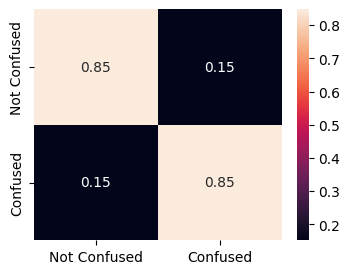

## if not diagonal, False~
## positive or negative depends on references --> is that in the same column, if so positive

In [8]:
X_train = np.array(x_train_list).reshape(-1, input_dim_, input_dim_, 1)

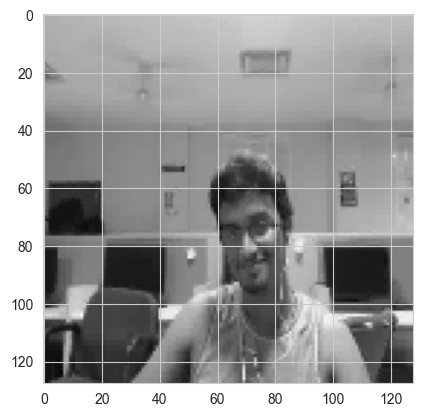

In [34]:
# X_train.shape = (5358, 48, 48, 1)
# X_test.shape = (x_test, 48, 48, 1)
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [35]:
# load pickle file
with open('Test.pkl', 'rb') as f:
    test_features, test_labels = pickle.load(f)

In [36]:
x_test_list = []
y_test_list = []
for pic, label in zip(test_features, test_labels):
    # plt.imshow(img_gray, cmap='binary_r')
    x_test_list.append(pic)
    y_test_list.append(label)

In [37]:
X_test = np.array(x_test_list).reshape(-1, input_dim_, input_dim_, 1)

In [38]:
X_test.shape

(5376, 128, 128, 1)

In [39]:
# load pickle file
with open('Validation.pkl', 'rb') as f:
    valid_features, valid_labels = pickle.load(f)

In [40]:
x_valid_list = []
y_valid_list = []
for pic, label in zip(valid_features, valid_labels):
    # plt.imshow(img_gray, cmap='binary_r')
    x_valid_list.append(pic)
    y_valid_list.append(label)

In [41]:
X_valid = np.array(x_valid_list).reshape(-1, input_dim_, input_dim_, 1)

In [42]:
X_valid.shape

(4005, 128, 128, 1)

<AxesSubplot: xlabel='y', ylabel='count'>

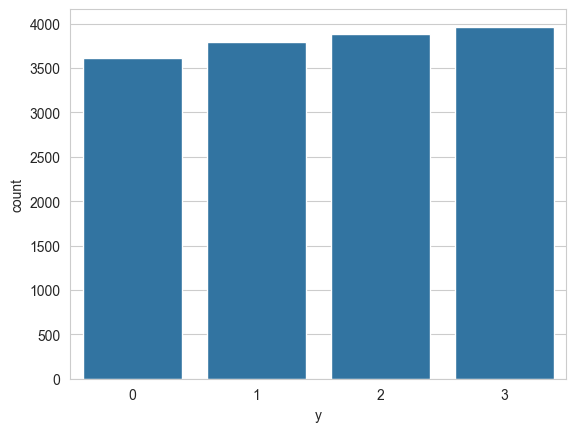

In [43]:
df = pd.DataFrame({'y': y_train_list})
sns.countplot(data=df, x='y')

<AxesSubplot: xlabel='y', ylabel='count'>

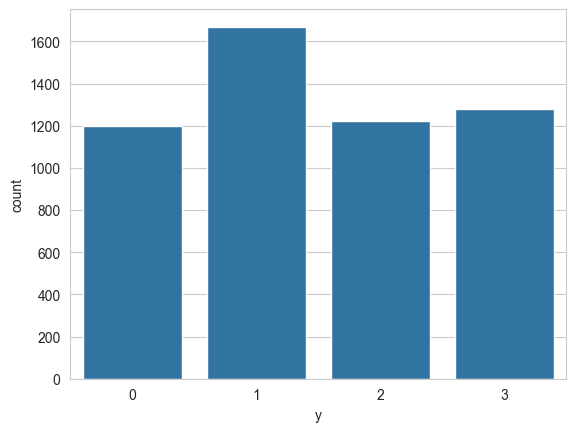

In [44]:
df = pd.DataFrame({'y': y_test_list})
sns.countplot(data=df, x='y')

<AxesSubplot: xlabel='y', ylabel='count'>

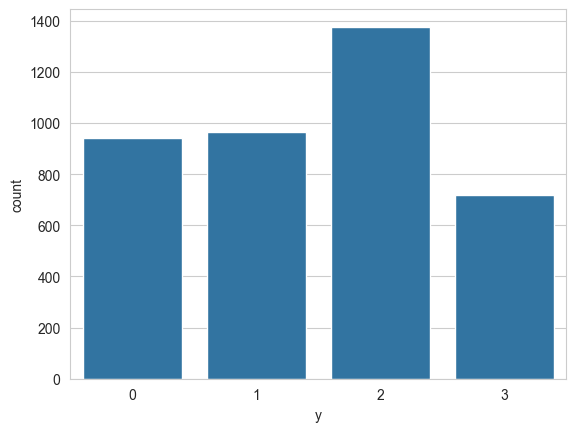

In [45]:
df = pd.DataFrame({'y': y_valid_list})
sns.countplot(data=df, x='y')

In [46]:
np.array(y_train_list).shape

(15255,)

In [73]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
Y_train = to_categorical(np.array(y_train_list))
Y_test = to_categorical(np.array(y_test_list))
Y_validation = to_categorical(np.array(y_valid_list))
Y_train[200]

array([0., 1., 0., 0.], dtype=float32)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((12204, 128, 128, 1), (3051, 128, 128, 1))

In [81]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


2024-05-19 21:02:59.502562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


382/382 [==============================] - 55s 143ms/step - loss: 5.2598 - accuracy: 0.5629
Epoch 2/30
382/382 [==============================] - 51s 134ms/step - loss: 0.6590 - accuracy: 0.7373
Epoch 3/30
382/382 [==============================] - 54s 140ms/step - loss: 0.5048 - accuracy: 0.8017
Epoch 4/30
 31/382 [=>............................] - ETA: 56s - loss: 0.3475 - accuracy: 0.8609

KeyboardInterrupt: 

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 conv2d_15 (Conv2D)          (None, 122, 122, 32)      18464     
                                                                 
 flatten_4 (Flatten)         (None, 476288)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 1905156   
                                                                 
Total params: 1,925,284
Trainable params: 1,925,284
Non-trainable params: 0
_________________________________________________________________


In [82]:
prediction_proba = model.predict(x_test)
y_predict = prediction_proba.argmax(axis=1)

 2/96 [..............................] - ETA: 7s 

2024-05-19 21:05:49.043001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 2s 24ms/step


In [83]:
y_predict.shape

(3051,)

In [84]:
y_true = y_test.argmax(axis=1)

In [85]:
# y_true = np.array(y_test_list)

In [86]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_predict, normalize='true')

<AxesSubplot: >

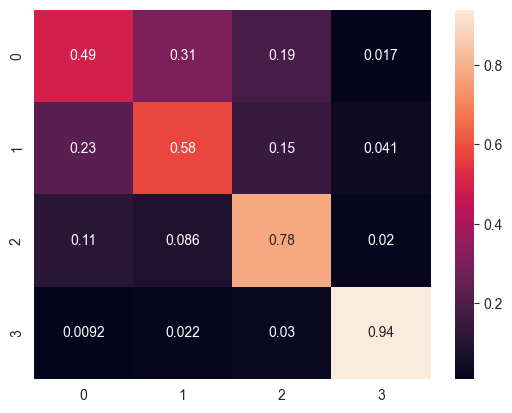

In [87]:
sns.heatmap(conf_mat, annot=True)